In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
df=df.dropna()

In [5]:
df['quality_binary'] = [1 if x >= 6 else 0 for x in df['quality']]

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0


In [8]:
x=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 
'sulphates', 'alcohol']].to_numpy()
y=df[['quality_binary']].to_numpy()
y = y.astype('float64')
 

In [9]:
print('Column-wise means:', np.mean(x, axis=0))
print('Column-wise standard deviations:', np.std(x, axis=0))

Column-wise means: [ 8.31667724  0.52825618  0.27040583  2.53823716  0.08759163 15.8560558
 46.36334813  0.996745    3.31135067  0.65826886 10.42355739]
Column-wise standard deviations: [1.74283048e+00 1.79357701e-01 1.94873323e-01 1.41764613e+00
 4.73236071e-02 1.04921484e+01 3.29199207e+01 1.89065013e-03
 1.54728930e-01 1.70120577e-01 1.06235343e+00]


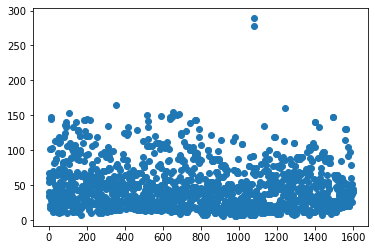

In [18]:
#plt.scatter(df.index, df['fixed acidity'])
plt.scatter(df.index, df['total sulfur dioxide'])
plt.show()

In [14]:
x = (x-np.mean(x, axis=0))/np.std(x, axis=0)

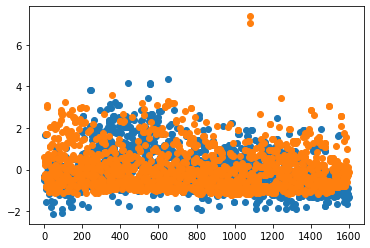

In [16]:
plt.scatter(df.index, x[:,0])
plt.scatter(df.index, x[:,6])
plt.show()

In [19]:
print(x.shape)
print(y.shape)

(1577, 11)
(1577, 1)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1261, 11) (1261, 1) (316, 11) (316, 1)


In [21]:
#sigmoid function 
def sigmoid(a):
    x = 1/(1+np.exp(-a))
    return x 

In [22]:
#loss function 
#binary cross entropy loss 

def cross_entropy_loss(yhat, y): 
    l = np.mean(-y*np.log(yhat)-(1-y)*np.log(1-yhat))

    return l

In [36]:
#defining w 
w = np.random.normal(0, 0.01, size = (x_train.shape[1],1))
b = np.random.normal(0, 0.01, size = (1))

In [24]:
#matrix operation
def perceptron(x, w, b):
    #print(x.shape)
    yhat = np.dot(x, w) + b
    yhat = sigmoid(yhat)
    
    return yhat 

In [25]:
#def compute_gradient (x, y, w, b):
# m = no. of rows/data points, n = no. of colummns   
   # m, n = x.shape
# b = np.random.normal(0, 0.5, size = 1)
    #dl_dw = np.zeros(w.shape)
    #dl_db = 0.
    #for i in range (m):
     #   z_wb = 0
      #  for l in range(n):
       #     z_wb_il = w[l] * x[i,l]
        #    z_wb += z_wb_il
        #z_wb += b
        #f_wb = sigmoid(z_wb)
        #dl_db_i = f_wb - y[i]
        #dl_db += dl_db_i
        #for l in range(n):
         #   dl_dw_il = (f_wb - y[i]) * x[i,l]
          #  dl_dw[l] += dl_dw_il
        
    #dl_dw = dl_dw / m
    #dl_db = dl_db / m
       
    #return dl_db, dl_dw


In [26]:
#revised version
#Compute the gradients: partial derivatives of the cost/loss are calculated to find the direction that minimises the loss function.

def compute_gradient(x, y, w, b):
    #print(x.shape)
    m, n = x.shape 
    yhat = perceptron(x, w, b)
    dw = np.dot(x.T, (yhat-y))/m
    db = np.mean(yhat-y)
    
    return db, dw

In [ ]:
#def gradient_descent(x, y, w_in, b_in, loss_function, gradient_function, alpha, n_iters): 
    #m,n=x.shape
    #m=len(x)
    #l_history = []
    #w_history = []
    

    #for i in range(n_iters):
        #dl_db, dl_dw = compute_gradient(x, y, w_in, b_in, lambda_ = None)
        #w_in = w_in - alpha * dl_dw
        #b_in = b_in - alpha * dl_db
        #loss = cross_entropy_loss(w_in, b_in)
        #l_history.append(loss)
   
    #if i% math.ceil(n_iters/10) == 0 or i == (n_iters-1):
        #w_history.append(w_in)
        #print(f"Iteration {i:4}: Cost {float(l_history[-1]):8.2f} ")
    
    #return w_in, b_in, l_history, w_history


In [27]:
def gradient_descent(x, y, w, b, alpha, n): 
    for i in range(n): 
        #print(x.shape)
        db, dw = compute_gradient(x, y, w, b)
        w = w - alpha*dw
        b = b - alpha*db
        print('Loss:', cross_entropy_loss(perceptron(x, w, b), y))
    return w, b #INDENT

In [28]:
def predict(x, y, w, b):
    #print(x.shape)
    yhat = perceptron(x, w, b)
    yhat = np.round(yhat) 
    z = y - yhat 
    abs_z = np.abs(z)
    a = 1 - abs_z   #WAS 1-z --MISTAKE
    accu = np.sum(a)/a.shape[0]
    
    return accu
    
    
 #   m, n = x.shape
  #  p = np.zeros(m)
   # b = np.random.normal(0, 0.5, size= 1)

    #for i in range(m):
     #   z_wb = 0
      #  for l in range(n):
          #  z_wb += x[i,l]*w[l]
    #z_wb += b
    #f_wb = sigmoid(z_wb)
    #p[i] = np.round(f_wb)
    
    #count_corr = 0
    #for i in range(m):
     #   if p[i] == y[i]:
      #      count_corr += 1
    #return p,count_corr/m

In [37]:
w, b = gradient_descent(x_train, y_train, w, b, 0.5, 1000)

Loss: 0.6410998692470731
Loss: 0.6079579058386431
Loss: 0.5863304948788864
Loss: 0.5715445379292703
Loss: 0.5610074987934514
Loss: 0.5532302862914229
Loss: 0.5473190984686108
Loss: 0.5427140546504093
Loss: 0.5390507759725647
Loss: 0.5360840675915115
Loss: 0.5336440795915132
Loss: 0.5316101433605795
Loss: 0.5298946093721313
Loss: 0.5284325521580298
Loss: 0.5271750316319733
Loss: 0.5260845742995494
Loss: 0.5251320770383362
Loss: 0.5242946442283295
Loss: 0.5235540503471486
Loss: 0.5228956297774248
Loss: 0.5223074634962412
Loss: 0.5217797753431562
Loss: 0.5213044783766692
Loss: 0.5208748301433451
Loss: 0.52048516794891
Loss: 0.5201307035628981
Loss: 0.5198073625440787
Loss: 0.5195116573975522
Loss: 0.5192405866217931
Loss: 0.5189915537418488
Loss: 0.5187623018989883
Loss: 0.5185508606439254
Loss: 0.5183555023747116
Loss: 0.5181747064509448
Loss: 0.5180071294588472
Loss: 0.5178515804365496
Loss: 0.5177070001238738
Loss: 0.5175724434964692
Loss: 0.5174470649951664
Loss: 0.5173301059788115
Lo

Loss: 0.5152913356123607
Loss: 0.5152913308315481
Loss: 0.515291326096347
Loss: 0.5152913214063218
Loss: 0.5152913167610413
Loss: 0.5152913121600784
Loss: 0.5152913076030098
Loss: 0.5152913030894166
Loss: 0.5152912986188837
Loss: 0.5152912941910001
Loss: 0.5152912898053584
Loss: 0.5152912854615556
Loss: 0.5152912811591922
Loss: 0.5152912768978729
Loss: 0.5152912726772055
Loss: 0.5152912684968021
Loss: 0.5152912643562784
Loss: 0.5152912602552538
Loss: 0.5152912561933511
Loss: 0.5152912521701971
Loss: 0.5152912481854217
Loss: 0.5152912442386587
Loss: 0.5152912403295453
Loss: 0.5152912364577221
Loss: 0.5152912326228334
Loss: 0.5152912288245263
Loss: 0.515291225062452
Loss: 0.5152912213362643
Loss: 0.515291217645621
Loss: 0.515291213990183
Loss: 0.515291210369614
Loss: 0.5152912067835814
Loss: 0.5152912032317554
Loss: 0.5152911997138098
Loss: 0.5152911962294212
Loss: 0.5152911927782692
Loss: 0.5152911893600367
Loss: 0.5152911859744096
Loss: 0.5152911826210768
Loss: 0.5152911792997299
Loss:

Loss: 0.5152908522106546
Loss: 0.5152908520403015
Loss: 0.5152908518715724
Loss: 0.5152908517044522
Loss: 0.5152908515389254
Loss: 0.5152908513749767
Loss: 0.5152908512125912
Loss: 0.5152908510517539
Loss: 0.51529085089245
Loss: 0.515290850734665
Loss: 0.5152908505783844
Loss: 0.5152908504235938
Loss: 0.515290850270279
Loss: 0.515290850118426
Loss: 0.5152908499680208
Loss: 0.5152908498190496
Loss: 0.5152908496714987
Loss: 0.5152908495253545
Loss: 0.5152908493806039
Loss: 0.5152908492372332
Loss: 0.5152908490952295
Loss: 0.5152908489545797
Loss: 0.515290848815271
Loss: 0.5152908486772904
Loss: 0.5152908485406252
Loss: 0.5152908484052633
Loss: 0.5152908482711918
Loss: 0.5152908481383985
Loss: 0.5152908480068714
Loss: 0.5152908478765982
Loss: 0.5152908477475672


In [38]:
accu = predict(x_test, y_test, w, b)

In [39]:
print(f"The accuracy is {accu*100}%.")

The accuracy is 75.0%.


In [40]:
import keras
from keras.layers import Dense
from keras.models import Sequential

model = Sequential([Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200)

Epoch 1/200
40/40 [==============================] - 1s 9ms/step - loss: 0.8860 - accuracy: 0.4227 - val_loss: 0.8965 - val_accuracy: 0.4209
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.8488 - accuracy: 0.4473 - val_loss: 0.8593 - val_accuracy: 0.4462
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.8154 - accuracy: 0.4639 - val_loss: 0.8271 - val_accuracy: 0.4715
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7860 - accuracy: 0.4901 - val_loss: 0.7977 - val_accuracy: 0.5000
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7594 - accuracy: 0.5139 - val_loss: 0.7715 - val_accuracy: 0.5158
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7354 - accuracy: 0.5313 - val_loss: 0.7479 - val_accuracy: 0.5316
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7144 - accuracy: 0.5551 - val_loss: 0.7276 - val_accuracy: 0.5696
Epoch 8/200
4

Epoch 59/200
40/40 [==============================] - 0s 4ms/step - loss: 0.5204 - accuracy: 0.7423 - val_loss: 0.5428 - val_accuracy: 0.7468
Epoch 60/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 0.7415 - val_loss: 0.5429 - val_accuracy: 0.7500
Epoch 61/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.7415 - val_loss: 0.5426 - val_accuracy: 0.7500
Epoch 62/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.7407 - val_loss: 0.5425 - val_accuracy: 0.7500
Epoch 63/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.7407 - val_loss: 0.5424 - val_accuracy: 0.7532
Epoch 64/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.7407 - val_loss: 0.5421 - val_accuracy: 0.7532
Epoch 65/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7423 - val_loss: 0.5421 - val_accuracy: 0.7532
Epoch 

40/40 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7431 - val_loss: 0.5388 - val_accuracy: 0.7468
Epoch 117/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7383 - val_loss: 0.5388 - val_accuracy: 0.7500
Epoch 118/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7415 - val_loss: 0.5388 - val_accuracy: 0.7500
Epoch 119/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.7407 - val_loss: 0.5389 - val_accuracy: 0.7500
Epoch 120/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.7407 - val_loss: 0.5387 - val_accuracy: 0.7500
Epoch 121/200
40/40 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7415 - val_loss: 0.5388 - val_accuracy: 0.7468
Epoch 122/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.7399 - val_loss: 0.5389 - val_accuracy: 0.7500
Epoch 123/200

40/40 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7383 - val_loss: 0.5380 - val_accuracy: 0.7500
Epoch 174/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.7423 - val_loss: 0.5379 - val_accuracy: 0.7500
Epoch 175/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.7391 - val_loss: 0.5382 - val_accuracy: 0.7500
Epoch 176/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.7375 - val_loss: 0.5382 - val_accuracy: 0.7500
Epoch 177/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.7383 - val_loss: 0.5382 - val_accuracy: 0.7532
Epoch 178/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.7383 - val_loss: 0.5383 - val_accuracy: 0.7500
Epoch 179/200
40/40 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.7383 - val_loss: 0.5383 - val_accuracy: 0.7500
Epoch 180/200